In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# 🚫 Ignore warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv(r"cleaned_coffee_sales.csv")
df.head(4)


,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,0,0,0,0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,1,1,1,1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,2,2,2,2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,3,3,3,3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning


In [ ]:
# checking for nulls
df.isnull().sum()


Unnamed: 0.1    0
Unnamed: 0      0
id              0
date            0
time            0
quantity        0
location        0
unit_price      0
category        0
product         0
detail          0
sales           0
month           0
day             0
year            0
weekday         0
hour            0
time_of_day     0
dtype: int64

In [ ]:
# Find duplicated rows based on the 'id' column
duplicates = df[df.duplicated(subset='id', keep=False)]
duplicates


,Unnamed: 0.1,Unnamed: 0,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day


In [ ]:
# summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  149116 non-null  int64  
 1   Unnamed: 0    149116 non-null  int64  
 2   id            149116 non-null  int64  
 3   date          149116 non-null  object 
 4   time          149116 non-null  object 
 5   quantity      149116 non-null  int64  
 6   location      149116 non-null  object 
 7   unit_price    149116 non-null  float64
 8   category      149116 non-null  object 
 9   product       149116 non-null  object 
 10  detail        149116 non-null  object 
 11  sales         149116 non-null  float64
 12  month         149116 non-null  object 
 13  day           149116 non-null  int64  
 14  year          149116 non-null  int64  
 15  weekday       149116 non-null  object 
 16  hour          149116 non-null  int64  
 17  time_of_day   149116 non-null  object 
dtypes: f

In [ ]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [ ]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0.1  149116 non-null  int64         
 1   Unnamed: 0    149116 non-null  int64         
 2   id            149116 non-null  int64         
 3   date          149116 non-null  datetime64[ns]
 4   time          149116 non-null  object        
 5   quantity      149116 non-null  int64         
 6   location      149116 non-null  object        
 7   unit_price    149116 non-null  float64       
 8   category      149116 non-null  object        
 9   product       149116 non-null  object        
 10  detail        149116 non-null  object        
 11  sales         149116 non-null  float64       
 12  month         149116 non-null  object        
 13  day           149116 non-null  int64         
 14  year          149116 non-null  int64         
 15  weekday       149

In [ ]:
df.head()


,Unnamed: 0.1,Unnamed: 0,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,0,0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,1,1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,2,2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,3,3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,4,4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [ ]:
df.to_csv('cleaned_coffee_sales.csv')


### 📌 Q1. What is the total revenue generated by the coffee shop?
#### 💡 Why this is important:This helps measure the overall financial performance of the coffee shop over the given period.

In [ ]:
total_revenue = df['sales'].sum()
(f'Total Revenue: ${total_revenue:,.2f}')


'Total Revenue: $698,812.33'

### 📌 Q2. How many total transactions were recorded?
#### 💡 Why this matters:Total transactions (or orders) tell us how many times customers interacted with the shop — a key indicator of customer traffic and operational scale.

In [ ]:
# Total transactions using unique IDs
total_transactions = df['id'].nunique()

# Display result
print(f"🧾 Total Transactions: {total_transactions:,}")


🧾 Total Transactions: 149,116


### 📌 Q3. What is the Average Order Value (AOV)?
#### 💡 Why this matters:AOV helps you understand how much customers spend on average per order. It’s a key business performance metric.

In [ ]:
aov = total_revenue/total_orders
(f'Average Order Value (AOV): {aov:,.2f}')


'Average Order Value (AOV): 4.69'

### 📌 Q4. Which store location had the highest total revenue?
#### 💡 Why this matters:Knowing your top-performing store helps focus marketing, staffing, and inventory efforts in the right place.

In [95]:
# Group by store location and sum revenue
location_revenue = df.groupby('location')['revenue'].sum().sort_values(ascending=False)

# Display top location
top_location = location_revenue.idxmax()
top_revenue = location_revenue.max()

print(f"🏆 Peak Sales Location: {top_location}")
print(f"💰 Total Revenue: {top_revenue:,.2f}")


🏆 Peak Sales Location: Hell's Kitchen
💰 Total Revenue: 236,511.17


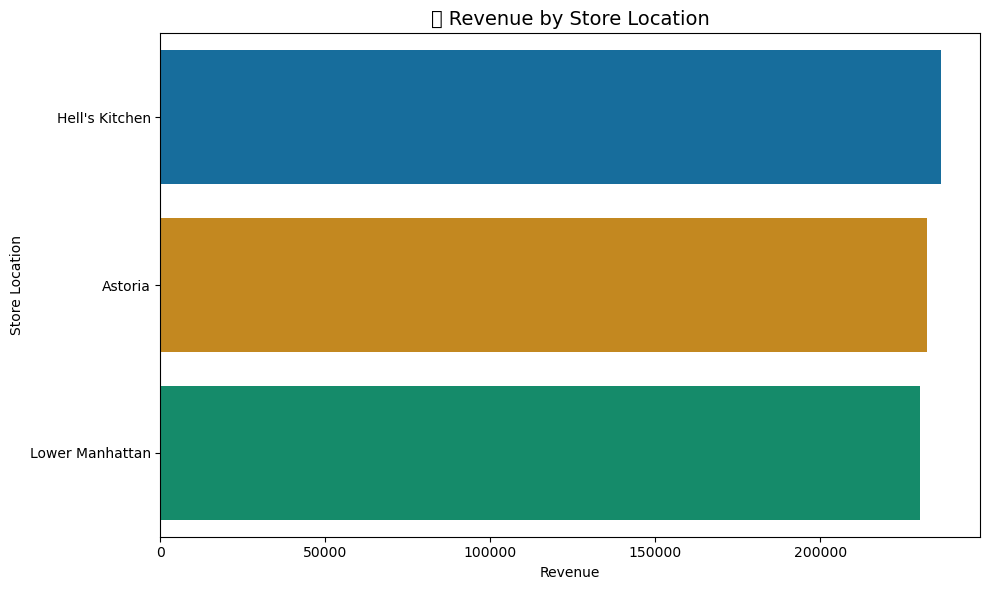

In [ ]:
df['revenue'] = df['unit_price'] * df['quantity']
location_revenue = df.groupby('location')['revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=location_revenue.values, y=location_revenue.index, palette="colorblind")
plt.title('🏙️ Revenue by Store Location', fontsize=14)
plt.xlabel('Revenue' )
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()


### 📌 Q5. What are the total sales (revenue) by month?
#### 💡 Why this matters:Monthly trends help identify seasonal spikes, promotional effects, or slow months — critical for planning inventory, staff, and offers.

In [ ]:
# Sum of sales for each month
revenue = df.groupby('month')['revenue'].sum().reset_index()
revenue


,month,revenue
0,April,118941.08
1,February,76145.19
2,January,81677.74
3,June,166485.88
4,March,98834.68
5,May,156727.76


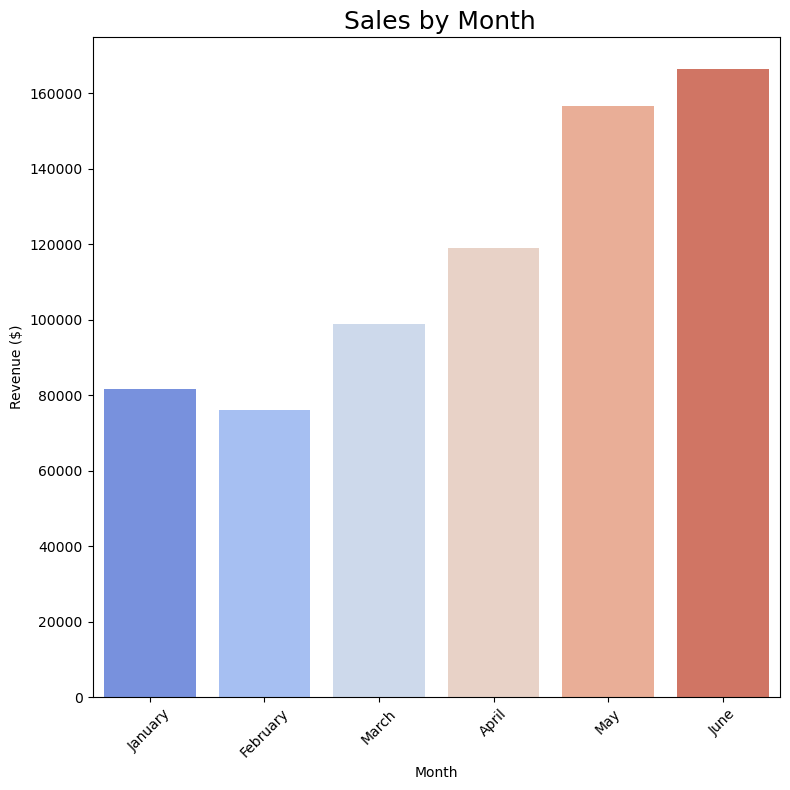

In [48]:
plt.figure(figsize=(8,8))
month_order = ['January', 'February', 'March', 'April', 'May', 'June']

sns.barplot(
    data=revenue,
    x='month',
    y='revenue',
    order=month_order,
    errorbar=None,
    palette="coolwarm"  # Optional color palette
)

plt.title(' Sales by Month', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📌 Q6. What are the total sales by store location?
### 💡 Why this matters:Analyzing location-wise performance helps identify your best- and worst-performing branches, guiding strategic decisions.

In [ ]:
# Sum of sales for each location
location_revenue = df.groupby('location')['sales'].sum().reset_index()
location_revenue


,location,sales
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


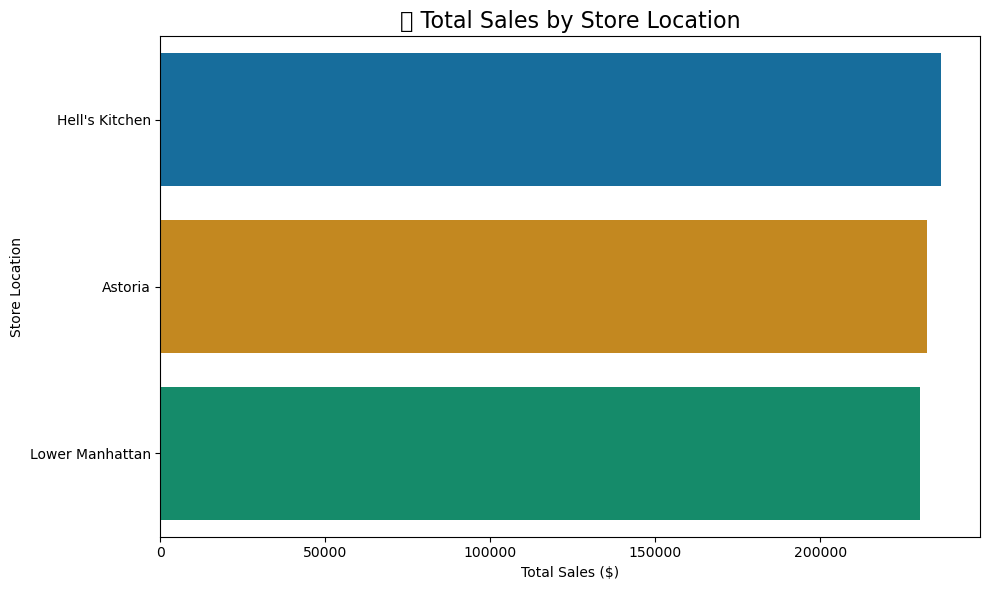

In [58]:
location_sales = df.groupby('location')['sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=location_sales, x='sales', y='location', palette='colorblind')

plt.title('🏙️ Total Sales by Store Location', fontsize=16)
plt.xlabel('Total Sales ($)')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()


## 📌 Q7. What are the top 10 products by total revenue?
### 💡 Why this matters:This reveals which products are driving the most income, helping you focus promotions, stock, and pricing strategies.

In [ ]:
top_products = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(10).reset_index()
top_products


,product,sales
0,Barista Espresso,91406.20
1,Brewed Chai tea,77081.95
2,Hot chocolate,72416.00
3,Gourmet brewed coffee,70034.60
4,Brewed Black tea,47932.00
5,Brewed herbal tea,47539.50
6,Premium brewed coffee,38781.15
7,Organic brewed coffee,37746.50
8,Scone,36866.12
9,Drip coffee,31984.00


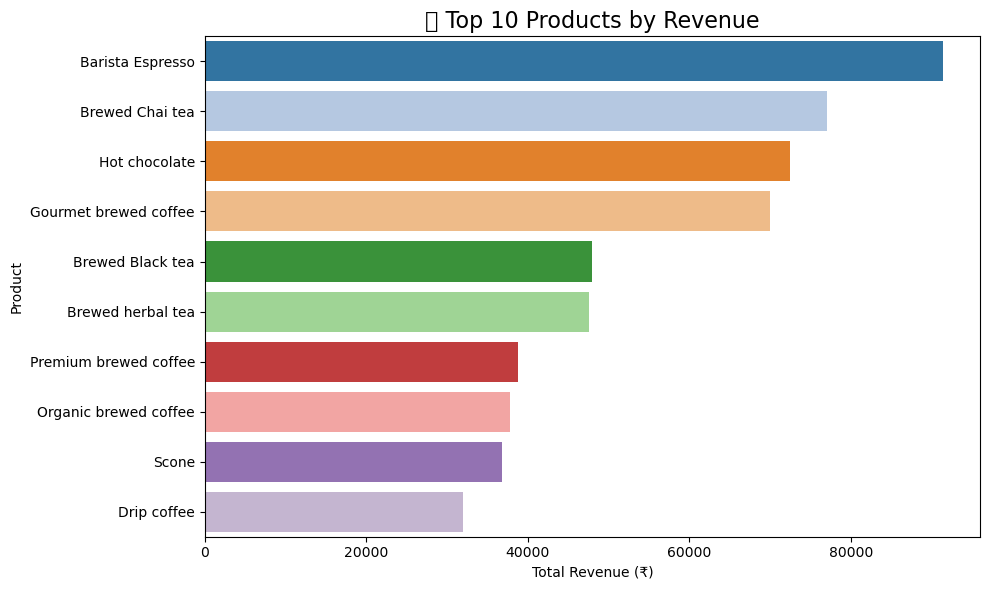

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='sales', y='product', palette='tab20')

plt.title('🏆 Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


### 📌 Q8. What is the Average Order Value (AOV) by Product Category?
### 💡 Why this matters:AOV by category helps identify which product categories bring in more money per transaction — useful for pricing and promotion strategies.

In [ ]:
category_aov = df.groupby('category')['sales'].mean().reset_index()
category_aov


,category,sales
0,Bakery,3.610969
1,Branded,18.215529
2,Coffee,4.621207
3,Coffee beans,22.866657
4,Drinking Chocolate,6.314615
5,Flavours,1.238409
6,Loose Tea,9.267438
7,Packaged Chocolate,9.050595
8,Tea,4.321458


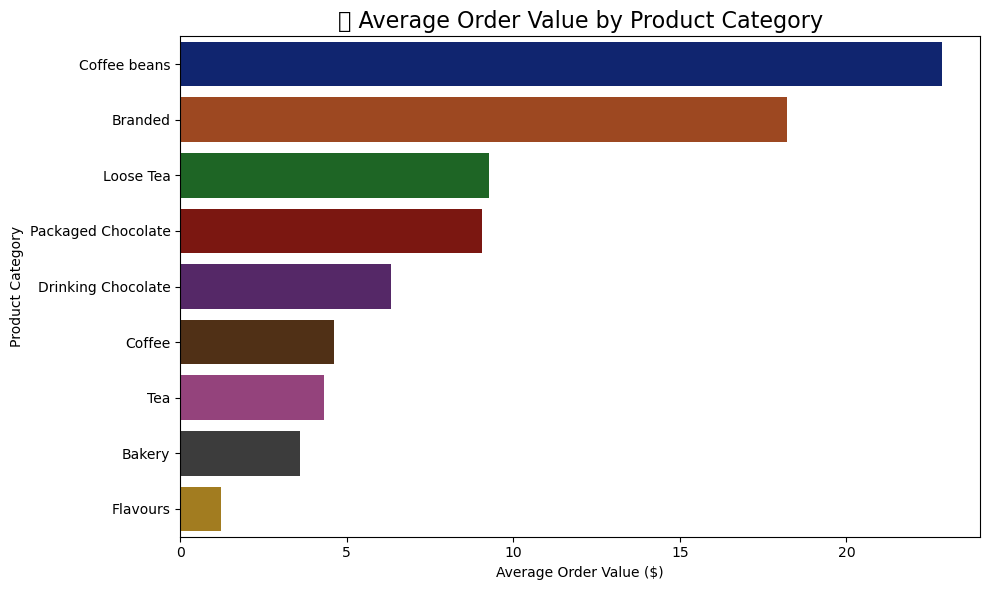

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data=category_aov, x='AOV', y='category', palette='dark')

plt.title('💸 Average Order Value by Product Category', fontsize=16)
plt.xlabel('Average Order Value ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


### 📌 Q9. What are the most popular product categories based on quantity sold?
### 💡 Why this matters:This shows what customers buy most often — helping you with stocking, combos, and marketing focus.

In [ ]:
# count of category
popular_categories = df.groupby('category')['quantity'].sum().sort_values(ascending=False).reset_index()
popular_categories


,category,quantity
0,Coffee,89250
1,Tea,69737
2,Bakery,23214
3,Drinking Chocolate,17457
4,Flavours,10511
5,Coffee beans,1828
6,Loose Tea,1210
7,Branded,776
8,Packaged Chocolate,487


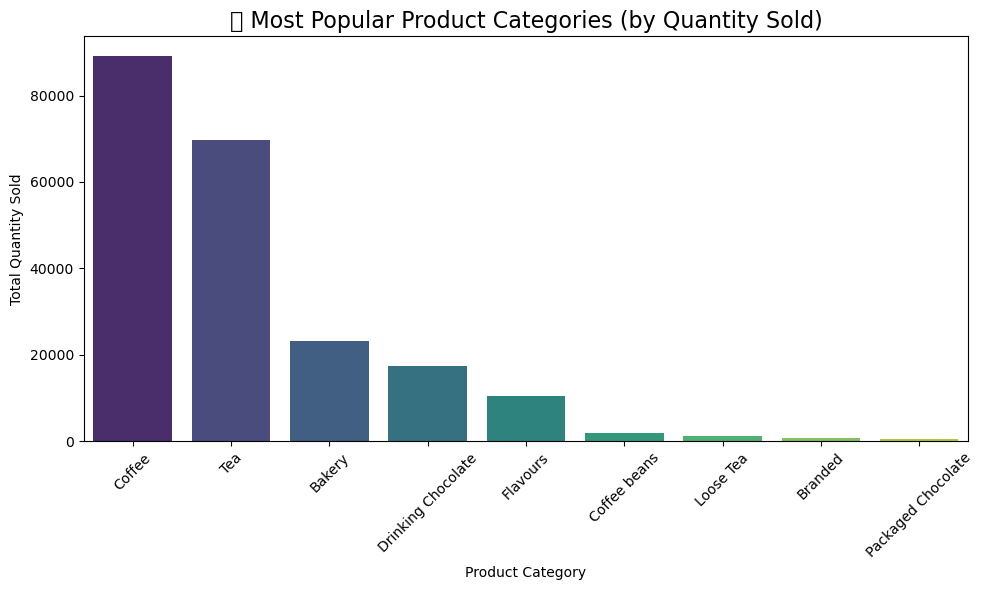

In [73]:
# Step 1: Group and sort by quantity
popular_categories = df.groupby('category')['quantity'].sum().sort_values(ascending=False).reset_index()

# Step 2: Plot vertical bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=popular_categories, x='category', y='quantity', palette='viridis')

plt.title('📦 Most Popular Product Categories (by Quantity Sold)', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotate if category names are long
plt.tight_layout()
plt.show()


## 📌 Q10. What is the peak hour of the day for sales?
### 💡 Why this matters:Understanding peak sales hours helps optimize staffing, marketing, and operations during rush times.



In [ ]:
order_per_hour = df.groupby('hour')['id'].count().reset_index()
order_per_hour


,hour,id
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


In [ ]:
# rename columns
order_per_hour.rename(columns = {'id':'count_of_orders'}, inplace = True)


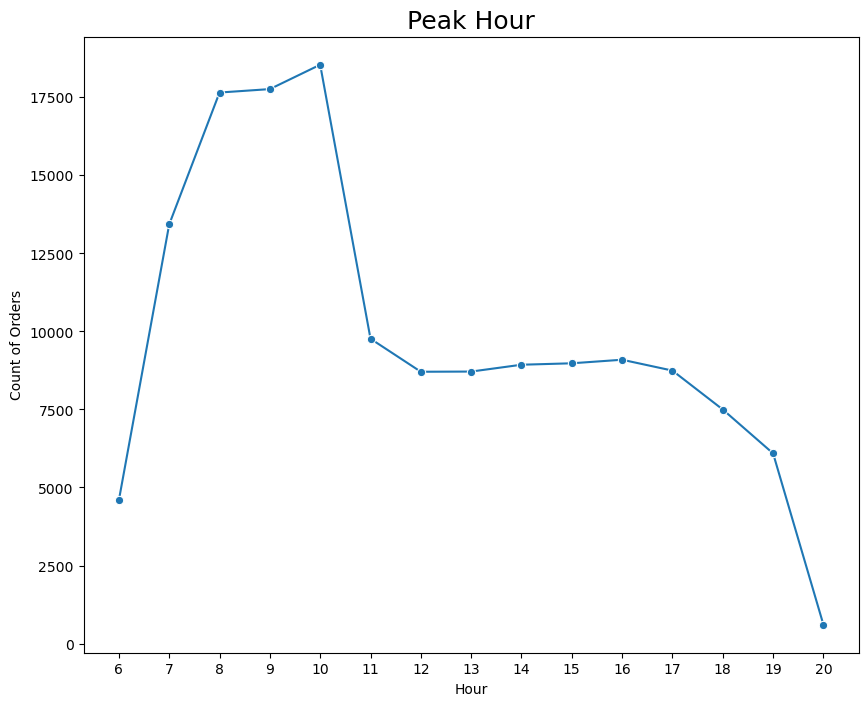

In [ ]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'hour', y = 'count_of_orders', data = order_per_hour, marker='o')
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('Peak Hour', fontsize = 18)
# Set the x-axis limits to the min and max values of 'hour'
plt.xticks(range(order_per_hour['hour'].min(), order_per_hour['hour'].max() + 1))
plt.show()


### 📌 Q11. Which day of the week has the highest sales?
#### 💡 Why this matters:Identifying the most profitable days helps with staffing, scheduling promotions, and optimizing supply.

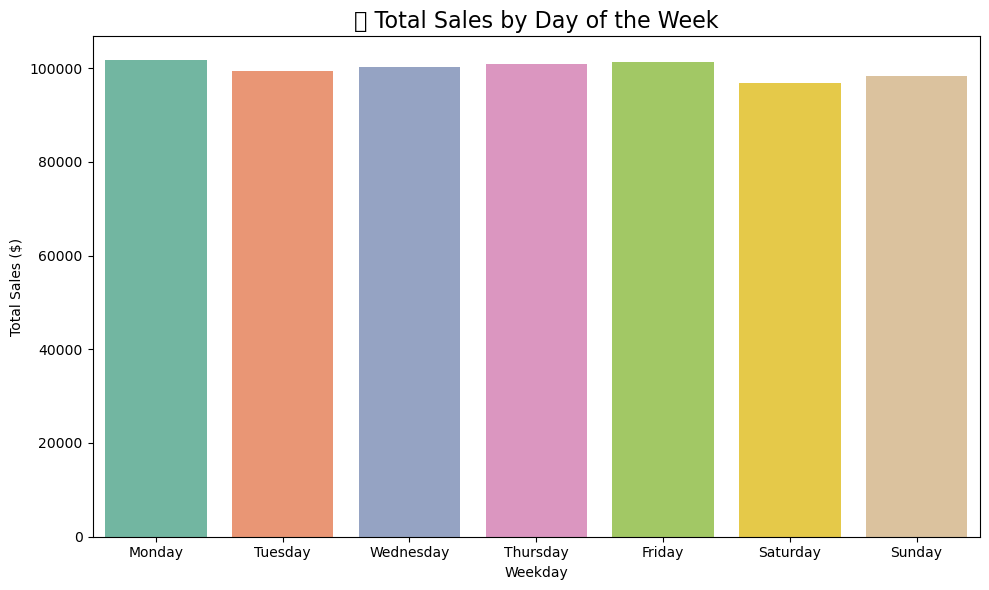

In [89]:
weekday_sales = df.groupby('weekday')['sales'].sum().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['weekday'] = pd.Categorical(weekday_sales['weekday'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('weekday')
plt.figure(figsize=(10,6))
sns.barplot(data=weekday_sales, x='weekday', y='sales', palette='Set2')

plt.title('📅 Total Sales by Day of the Week', fontsize=16)
plt.xlabel('Weekday')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


### 📌 Q12. Distribution of Orders Across Different Coffee Types
### 💡 Why this matters:Understanding which coffee types (like Latte, Cappuccino, Espresso) are most popular helps in product planning, bundling, and upselling.

In [ ]:
coffee_orders = df.groupby('detail')['quantity'].sum().sort_values(ascending=False).reset_index()


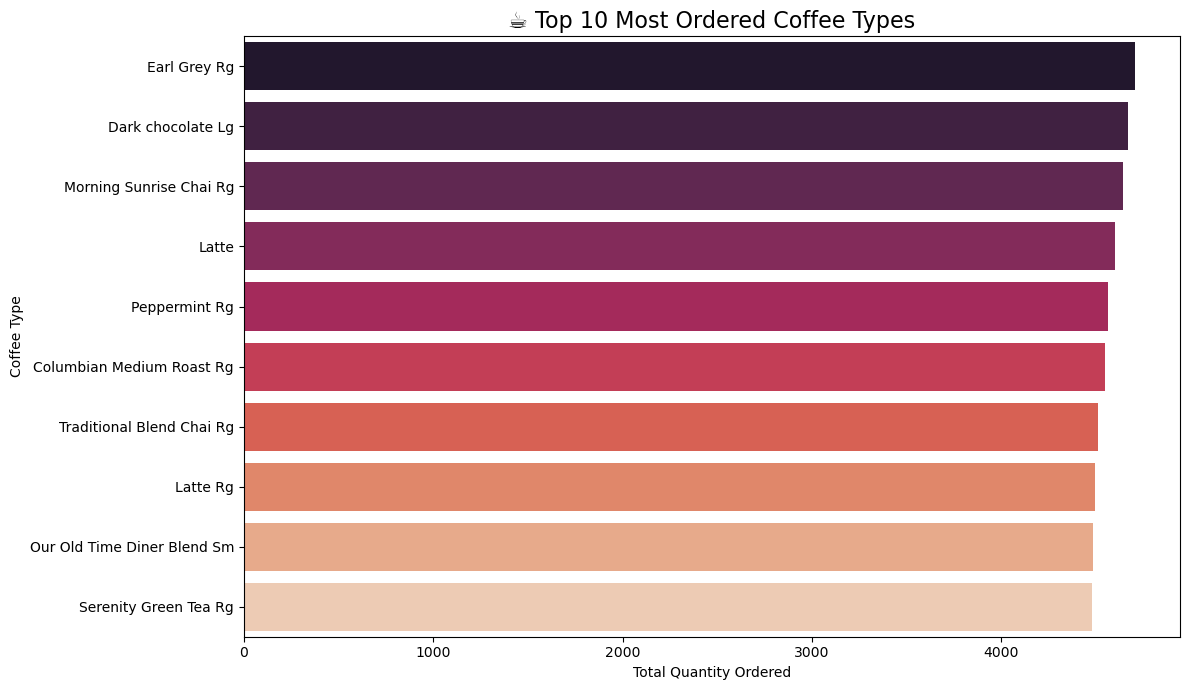

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=coffee_orders.head(10), x='quantity', y='detail', palette='rocket')

plt.title('☕ Top 10 Most Ordered Coffee Types', fontsize=16)
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Coffee Type')
plt.tight_layout()
plt.show()


In [100]:
# Total transactions using unique IDs
total_transactions = df['id'].nunique()

# Display result
print(f"🧾 Total Transactions: {total_transactions:,}")


🧾 Total Transactions: 149,116


### 📌 Q14. Which product category is the most profitable?
#### 💡 Why this matters:Identifying the most revenue-generating category helps the business focus efforts on high-performing products and set pricing/promotions accordingly.



In [ ]:
category_revenue = df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index()
category_revenue


,category,sales
0,Coffee,269952.45
1,Tea,196405.95
2,Bakery,82315.64
3,Drinking Chocolate,72416.00
4,Coffee beans,40085.25
5,Branded,13607.00
6,Loose Tea,11213.60
7,Flavours,8408.80
8,Packaged Chocolate,4407.64


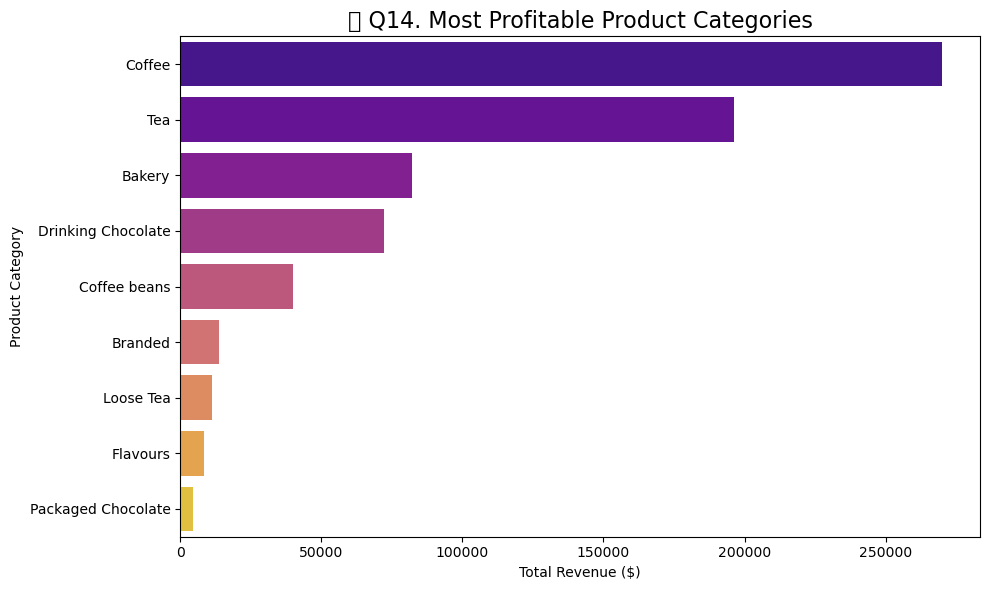

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(data=category_revenue, x='sales', y='category', palette='plasma')

plt.title('💰 Q14. Most Profitable Product Categories', fontsize=16)
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


### 📌 Q15. Are there any seasonal product demand patterns?
#### 💡 Why this matters:Understanding seasonal trends helps align inventory, offers, and marketing campaigns with real customer demand across months or seasons.



In [106]:
monthly_category_sales = df.groupby(['month', 'category'])['quantity'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_category_sales['month'] = pd.Categorical(monthly_category_sales['month'], categories=month_order, ordered=True)
monthly_category_sales = monthly_category_sales.sort_values('month')


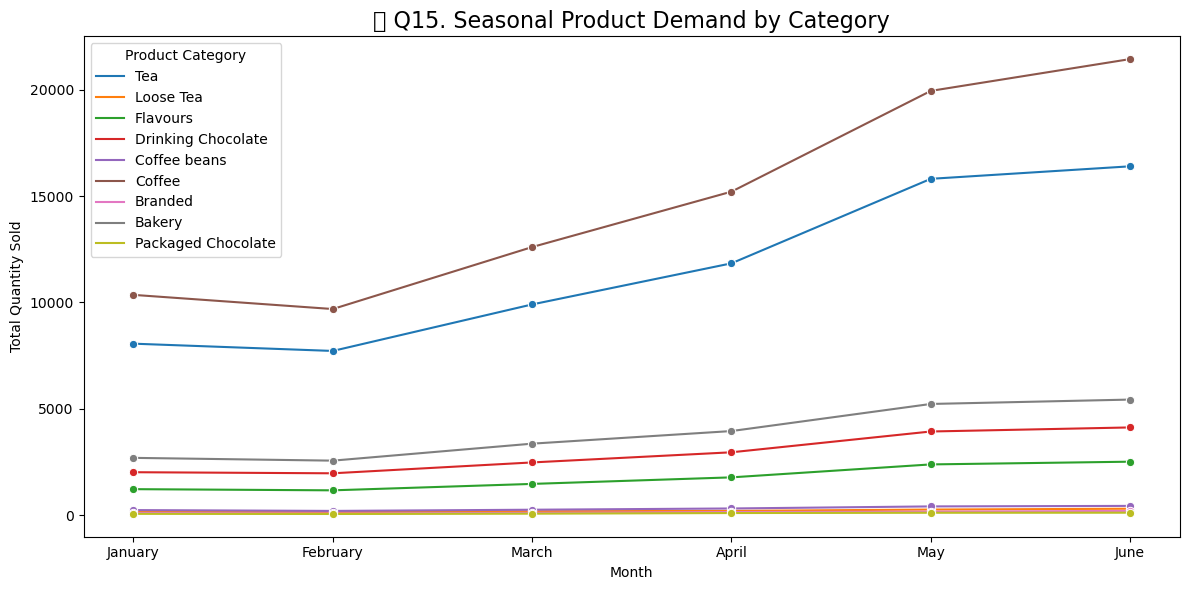

In [107]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_category_sales, x='month', y='quantity', hue='category', marker='o')

plt.title('🌤️ Q15. Seasonal Product Demand by Category', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


# 🎯 Bonus Visualization 1: 🔥 Heatmap — Hour vs Weekday (Sales Count)

## 📌 Objective: Show when the store is busiest.



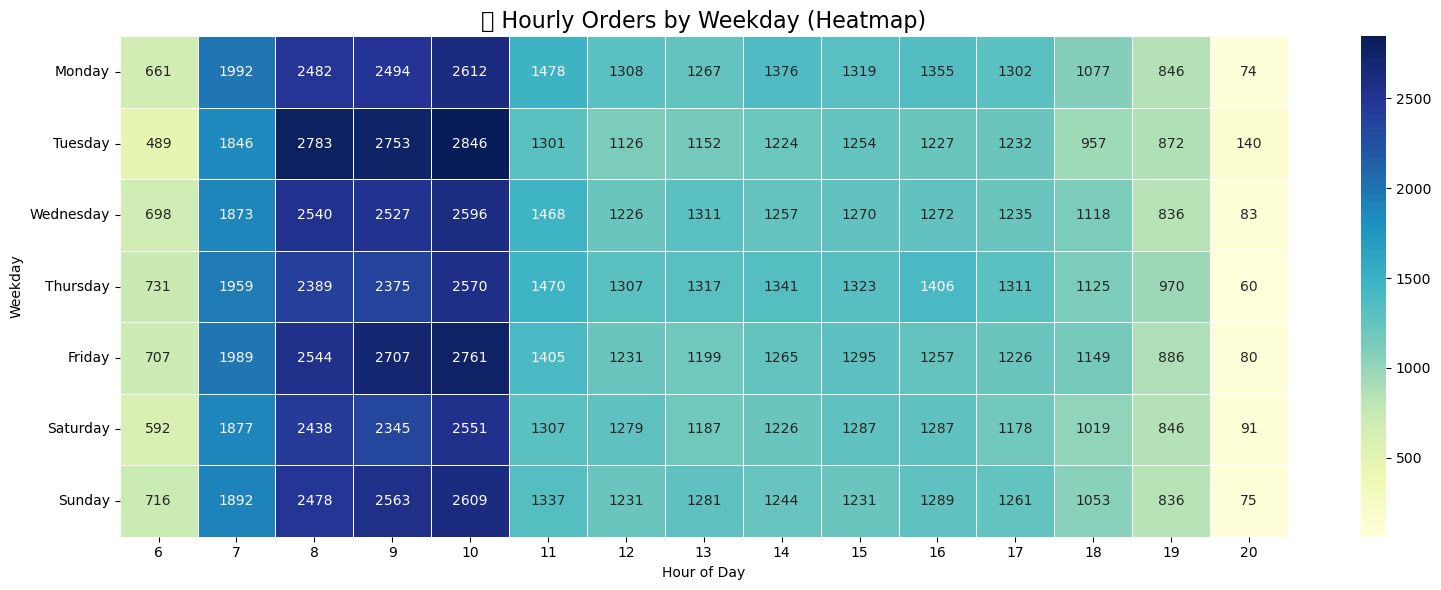

In [108]:
# Create pivot table for heatmap
heatmap_data = df.pivot_table(index='weekday', columns='hour', values='id', aggfunc='count').fillna(0)

# Reorder weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

# Plot heatmap
plt.figure(figsize=(16,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)

plt.title('🔥 Hourly Orders by Weekday (Heatmap)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


# 🎯 Bonus Visualization 2: 🥧 Pie Chart — Product Category Contribution (Revenue)

## 📌 Objective: Show share of revenue by category.

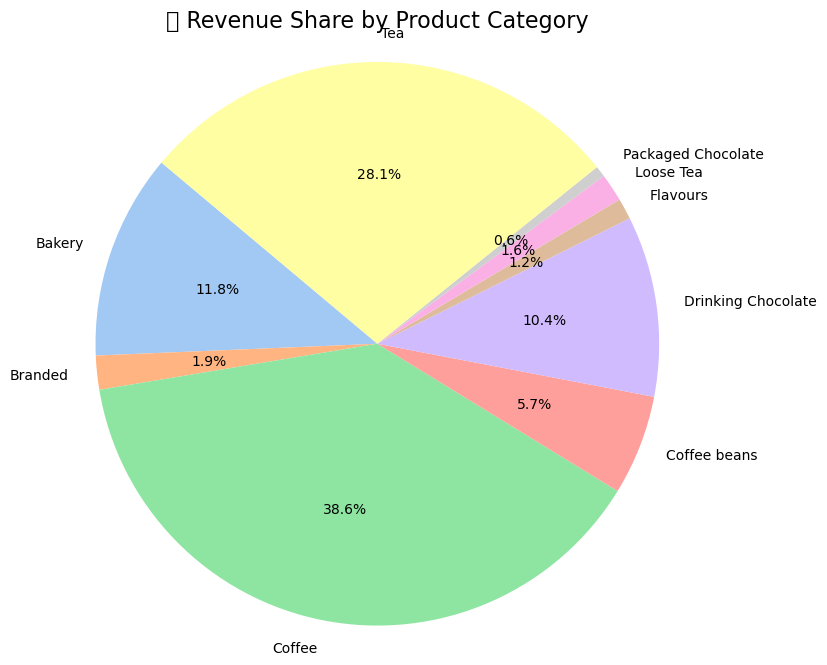

In [109]:
# Prepare data
category_revenue = df.groupby('category')['sales'].sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('🥧 Revenue Share by Product Category', fontsize=16)
plt.axis('equal')
plt.show()


# 🎯 Bonus Visualization 3: 📦 Bar Plot — Top 10 Products by Quantity & Revenue

#  A. Top 10 by Quantity
#  B. Top 10 by Revenue

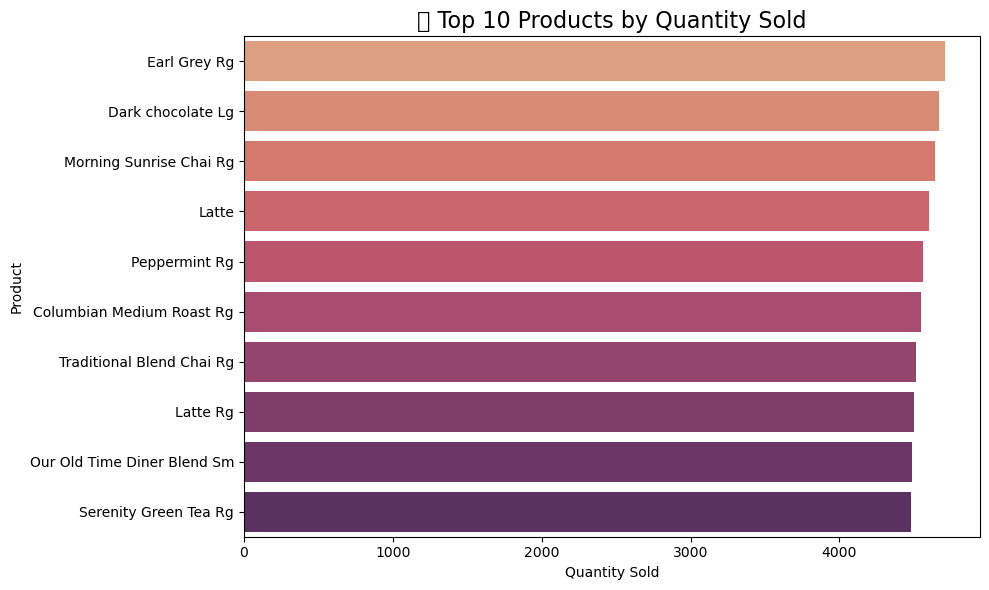

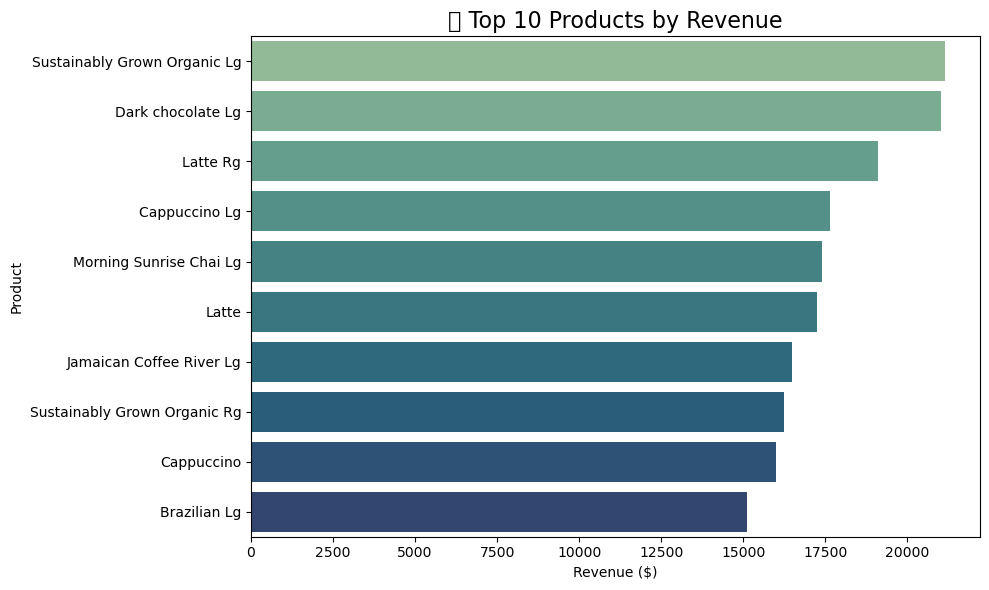

In [112]:
top_qty = df.groupby('detail')['quantity'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_qty, x='quantity', y='detail', palette='flare')
plt.title('📦 Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()
top_revenue = df.groupby('detail')['sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_revenue, x='sales', y='detail', palette='crest')
plt.title('💰 Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Revenue ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()
